In [7]:
!pip install numpy matplotlib scikit-learn

  Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 3.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 6.0 MB/s eta 0:00:00m eta 0:00:010:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 6.0 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 7.4 MB/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from itertools import product

In [3]:
def gerar_dados(n_entradas, tipo='AND'):
    X = np.array(list(product([0, 1], repeat=n_entradas)))
    if tipo == 'AND':
        y = np.array([int(np.all(x)) for x in X])
    elif tipo == 'OR':
        y = np.array([int(np.any(x)) for x in X])
    elif tipo == 'XOR':
        y = np.array([np.sum(x) % 2 for x in X])
    else:
        raise ValueError("Função lógica inválida.")
    return X, y
    
def plotar_hiperplano(X, y, clf, titulo):
    n = X.shape[1]

    if n == 2:
        # Caso 2D
        plt.figure(figsize=(6, 6))
        for xi, yi in zip(X, y):
            plt.scatter(xi[0], xi[1], c='red' if yi == 1 else 'blue', s=100, edgecolors='k')

        x_vals = np.array(plt.gca().get_xlim())
        if clf.coef_[0][1] != 0:
            y_vals = -(clf.intercept_[0] + clf.coef_[0][0] * x_vals) / clf.coef_[0][1]
            plt.plot(x_vals, y_vals, '--', c='green')

        plt.title(titulo + " (2D)")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.grid()
        plt.show()

    elif n == 3:
        # Caso 3D
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        for xi, yi in zip(X, y):
            ax.scatter(xi[0], xi[1], xi[2], c='red' if yi == 1 else 'blue', s=100, edgecolors='k')

        x_vals = np.linspace(0, 1, 10)
        y_vals = np.linspace(0, 1, 10)
        x_vals, y_vals = np.meshgrid(x_vals, y_vals)

        w0 = clf.intercept_[0]
        w1, w2, w3 = clf.coef_[0]

        if w3 != 0:
            z_vals = -(w0 + w1 * x_vals + w2 * y_vals) / w3
            ax.plot_surface(x_vals, y_vals, z_vals, alpha=0.5, color='green')

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('x3')
        ax.set_title(titulo + " (3D)")
        plt.show()

    else:
        # Caso n > 3 → PCA para 2D
        pca = PCA(n_components=2)
        X_reduzido = pca.fit_transform(X)

        plt.figure(figsize=(6, 6))
        for xi, yi in zip(X_reduzido, y):
            plt.scatter(xi[0], xi[1], c='red' if yi == 1 else 'blue', s=100, edgecolors='k')

        plt.title(titulo + f" (PCA de {n}D → 2D)")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.grid()
        plt.show()

def treinar_perceptron(X, y, titulo="", plot=False):
    clf = Perceptron(max_iter=1000, tol=1e-3)
    clf.fit(X, y)
    y_pred = clf.predict(X)

    print("Função:", titulo)
    print("Pesos:", clf.coef_)
    print("Bias:", clf.intercept_)
    print("Saídas esperadas:", y)
    print("Saídas previstas :", y_pred)
    print("Acurácia:", clf.score(X, y))
    print("-" * 40)

    plotar_hiperplano(X, y, clf, titulo)


Treinando Perceptron para AND com 2 entradas:
Função: AND com 2 entradas
Pesos: [[2. 2.]]
Bias: [-2.]
Saídas esperadas: [0 0 0 1]
Saídas previstas : [0 0 0 1]
Acurácia: 1.0
----------------------------------------


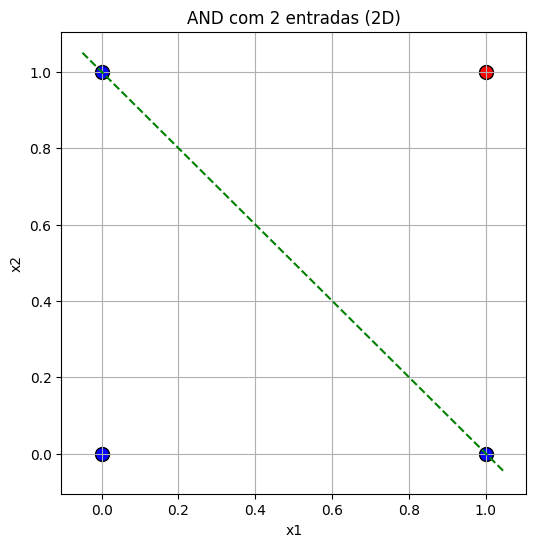


Treinando Perceptron para AND com 3 entradas:
Função: AND com 3 entradas
Pesos: [[3. 2. 1.]]
Bias: [-3.]
Saídas esperadas: [0 0 0 0 0 0 0 1]
Saídas previstas : [0 0 0 0 0 1 1 1]
Acurácia: 0.75
----------------------------------------


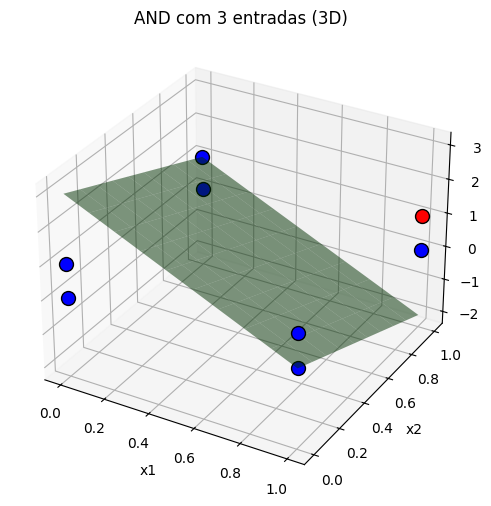


Treinando Perceptron para AND com 10 entradas:
Função: AND com 10 entradas
Pesos: [[ 1.  1. -1.  1.  0.  0. -1.  0.  1.  1.]]
Bias: [-7.]
Saídas esperadas: [0 0 0 ... 0 0 1]
Saídas previstas : [0 0 0 ... 0 0 0]
Acurácia: 0.9990234375
----------------------------------------


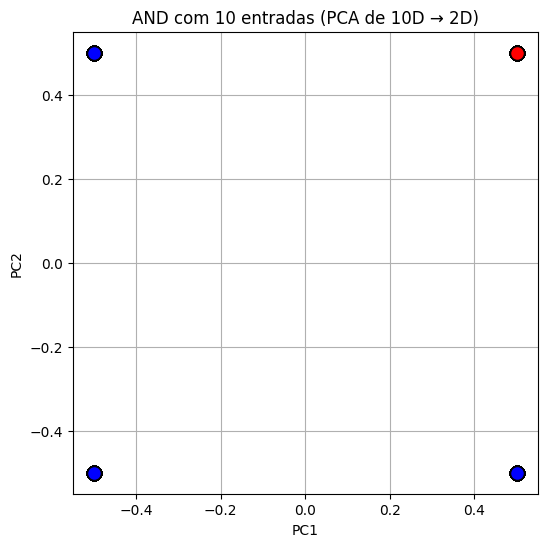


Treinando Perceptron para OR com 2 entradas:
Função: OR com 2 entradas
Pesos: [[2. 2.]]
Bias: [-1.]
Saídas esperadas: [0 1 1 1]
Saídas previstas : [0 1 1 1]
Acurácia: 1.0
----------------------------------------


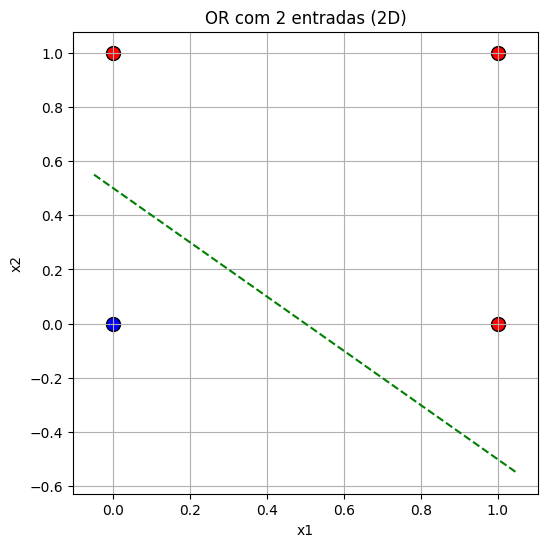


Treinando Perceptron para OR com 3 entradas:
Função: OR com 3 entradas
Pesos: [[2. 2. 2.]]
Bias: [-1.]
Saídas esperadas: [0 1 1 1 1 1 1 1]
Saídas previstas : [0 1 1 1 1 1 1 1]
Acurácia: 1.0
----------------------------------------


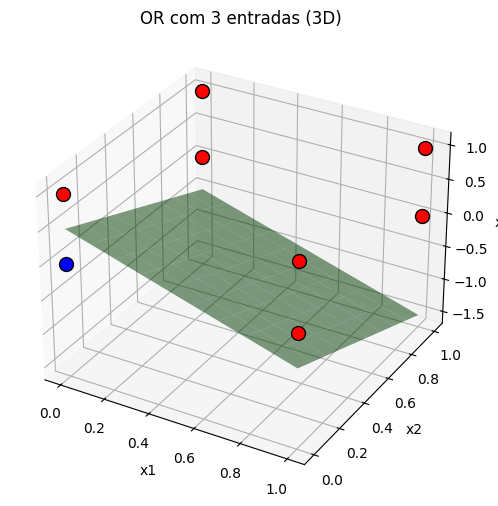


Treinando Perceptron para OR com 10 entradas:
Função: OR com 10 entradas
Pesos: [[1. 1. 1. 2. 2. 2. 1. 1. 1. 1.]]
Bias: [0.]
Saídas esperadas: [0 1 1 ... 1 1 1]
Saídas previstas : [0 1 1 ... 1 1 1]
Acurácia: 1.0
----------------------------------------


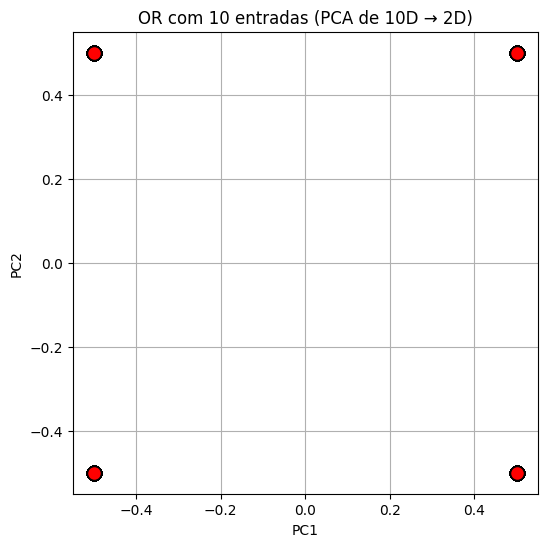


Treinando Perceptron para XOR com 2 entradas:
Função: XOR com 2 entradas
Pesos: [[0. 0.]]
Bias: [0.]
Saídas esperadas: [0 1 1 0]
Saídas previstas : [0 0 0 0]
Acurácia: 0.5
----------------------------------------


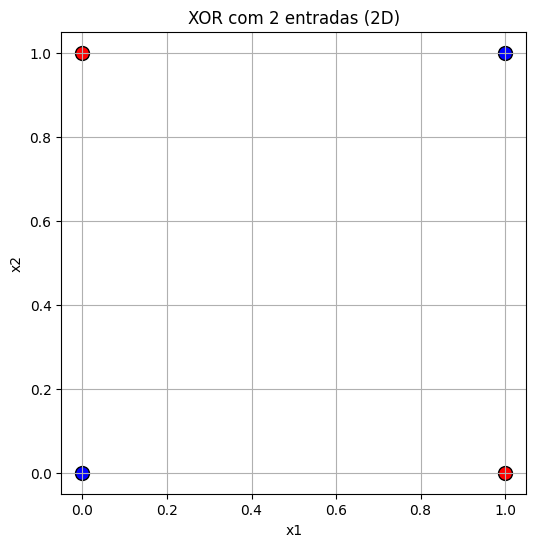

In [4]:
# Testes para funções lógicas AND, OR, e XOR com diferentes números de entradas

testes = [
    {'n': 2, 'tipo': 'AND'},
    {'n': 3, 'tipo': 'AND'},
    {'n': 10, 'tipo': 'AND'},
    {'n': 2, 'tipo': 'OR'},
    {'n': 3, 'tipo': 'OR'},
    {'n': 10, 'tipo': 'OR'},
    {'n': 2, 'tipo': 'XOR'},  # Para mostrar que Perceptron não resolve XOR
]

for teste in testes:
    n = teste['n']
    tipo = teste['tipo']
    
    print(f"\nTreinando Perceptron para {tipo} com {n} entradas:")
    X, y = gerar_dados(n, tipo=tipo)
    treinar_perceptron(X, y, titulo=f"{tipo} com {n} entradas")
